In this project, randomly chosen 574 restaurants will be scored according to their user rates and number of voters. Then they will be segmented using k-means.


The restaurant data were scraped from Restaurantguru.com where the rates and number of voters from various sites are kept. The related code is in the project web_scraping.py. The columns ending with '_rg' were extracted. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [3]:
dataset = pd.read_csv(r"C:\Users\PC\Documents\places_final.csv")

In [4]:
dataset.head()

,place_name,city,town,address,name_rg,price_check_rg,rank_rg,rating_rg,price_rg,address_rg,features_rg,website_rg,instagram_rg,cuisine_rg,yelp_rg,trip_rg,google_rate,google_total,checkpoint
0,11 Kadıköy,İstanbul,Kadıköy,CAFERAĞA MAH ARAYICI BAŞI SOK NO 11 A-1 KADIKO...,11 Kadıköy,No-Info,#221 of 72430 restaurants in Istanbul,Ratings of 11 Kadıköy\nZomato\n4.6 / 5\n1097\n...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nKadıköy\nArayıcıbaşı Sk. No:11, Istan...",Features\nСredit cards accepted\nOutdoor seati...,No-Info,@11kadikoy,Cocktail bars,No-Info,No-Info,4.4,437,True
1,3g pub,İzmir,Konak,CUMHURİYET BULVARI NO:18 KONAK IZMIR,3G Cafe,Expensive (average price TRY 410 - TRY 830),#1732 of 12479 cafes in Izmir,Ratings of 3G Cafe\nYelp\nNot rated yet\nFours...,$$$$ Price range per person TRY 410 - TRY 830,Address\nÇankaya\nKonak Mahallesi İzmirlioğlu ...,Features\nСredit cards accepted\nOutdoor seati...,No-Info,No-Info,No-Info,no_rating,No-Info,3.5,21,True
2,45 Bar Kadikoy,İstanbul,Kadıköy,İSTANBUL KADIKÖY KADIKOY ISTANBUL,45 Bar Kadikoy,No-Info,#1309 of 11620 pubs & bars in Istanbul,Ratings of 45 Bar Kadikoy\nZomato\n2.4 / 5\n83...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nKadıköy\nMiralay Nazım Sk. No:19/A, I...",Features\nСredit cards accepted\nWi-Fi\nBookin...,Website\n45likkadikoy.com,@45likcomtr,No-Info,No-Info,No-Info,3.7,565,True
3,6:45 Losers Club,İzmir,Konak,1482 SOKAK NO:10 KONAK IZMIR,6:45 Losers Club,Moderate (average price TRY 170 - TRY 410),#47 of 599 clubs in Izmir,Ratings of 6:45 Losers Club\nGoogle\n955,$$$$ Price range per person TRY 170 - TRY 410,"Address\nÇankaya\nMuzaffer İzgü Sk. No:10, Izm...",Features\nNo delivery\nOutdoor seating\nNo tak...,No-Info,No-Info,No-Info,No-Info,No-Info,4.1,1011,True
4,Adabeyi Balık Restoran,İzmir,Konak,ATATÜRK Cd.AKDENİZ Mh. No:19/d,Adabeyi Balık Restoran,Expensive (average price TRY 410 - TRY 830),#320 of 18291 restaurants in Izmir,Ratings of Adabeyi Balık Restoran\nYelp\n5\nZo...,$$$$ Price range per person TRY 410 - TRY 830,Address\nÇankaya\nKonak Atatürk Cad. Konak Pie...,Features\nСredit cards accepted\nOutdoor seati...,No-Info,No-Info,"Seafood, Turkish",yelp_block stars5,fill rate4_5,4.2,819,True


In [5]:
# rating_rg column should be arranged to split and hence get the scores.

dataset["rating_rg_split"] = dataset["rating_rg"].str.replace("\n", " ")

dataset["yelp_rate"] = 0.0
dataset["yelp_total"] = 0

dataset["zomato_rate"] = 0.0
dataset["zomato_total"] = 0

dataset["foursquare_rate"] = 0.0
dataset["foursquare_total"] = 0

dataset["trip_rate"] = 0.0
dataset["trip_total"] = 0

dataset["facebook_rate"] = 0.0
dataset["facebook_total"] = 0

for i in range(len(dataset)):
    a  =dataset.loc[i]["rating_rg_split"]
    alist = a.replace("/ ","").split(" ")
        
    # YELP
    try:
        index_yelp = alist.index("Yelp")
        if alist[index_yelp +1] == "Not":
            dataset.loc[i,"yelp_total"] = np.nan
        else:
            dataset.loc[i,"yelp_total"] = alist[index_yelp +1]
    except ValueError:
        dataset.loc[i,"yelp_total"] = np.nan
        
    if dataset.loc[i,"yelp_rg"] == "No-Info" or dataset.loc[i,"yelp_rg"] == "no_rating":
        dataset.loc[i,"yelp_rate"] = np.nan
    else:
        dataset.loc[i,"yelp_rate"] = float(dataset.loc[i,"yelp_rg"][16:].replace("_","."))
        

    # ZOMATO
    try:
        index_zomato = alist.index("Zomato")
        if alist[index_zomato +1] == "Not":
            dataset.loc[i,"zomato_rate"] = np.nan
            dataset.loc[i,"zomato_total"] = np.nan
        else:
            dataset.loc[i,"zomato_rate"] = float(alist[index_zomato +1])
            dataset.loc[i,"zomato_total"] = int(alist[index_zomato +3])
    except ValueError:
        dataset.loc[i,"zomato_rate"] = np.nan
        dataset.loc[i,"zomato_total"] = np.nan
    
    # FOURSQUARE
    try:
        index_fs = alist.index("Foursquare")
        if alist[index_fs +1] == "Not":
            dataset.loc[i,"foursquare_rate"] = np.nan
            dataset.loc[i,"foursquare_total"] = np.nan
        else:
            dataset.loc[i,"foursquare_rate"] = float(alist[index_fs +1])
            dataset.loc[i,"foursquare_total"] = int(alist[index_fs +3])
    except ValueError:
        dataset.loc[i,"foursquare_rate"] = np.nan
        dataset.loc[i,"foursquare_total"] = np.nan
    
    # TRIP
    try:
        index_trip = alist.index("Trip")
        if alist[index_trip +1] == "Not":
            dataset.loc[i,"trip_total"] = np.nan
        else:
            dataset.loc[i,"trip_total"] = int(alist[index_trip +1])
    except ValueError:
        dataset.loc[i,"trip_total"] = np.nan 
        
    if dataset.loc[i,"trip_rg"] == "No-Info" or dataset.loc[i]["trip_rg"] == "no_rating":
        dataset.loc[i,"trip_rate"] = np.nan
    else:
        dataset.loc[i,"trip_rate"] = float(dataset.loc[i,"trip_rg"][9:].replace("_","."))

    # FACEBOOK
    try:
        index_fb = alist.index("Facebook")
        if alist[index_fb +1] == "Not":
            dataset.loc[i,"facebook_rate"] = np.nan
            dataset.loc[i,"facebook_total"] = np.nan
        else:
            dataset.loc[i,"facebook_rate"] = float(alist[index_fb +1])
            dataset.loc[i,"facebook_total"] = int(alist[index_fb +2])
    except ValueError:
        dataset.loc[i,"facebook_rate"] = np.nan
        dataset.loc[i,"facebook_total"] = np.nan
    except IndexError:
        dataset.loc[i,"facebook_rate"] = np.nan
        dataset.loc[i,"facebook_total"] = np.nan

In [6]:
dataset.head()

,place_name,city,town,address,name_rg,price_check_rg,rank_rg,rating_rg,price_rg,address_rg,features_rg,website_rg,instagram_rg,cuisine_rg,yelp_rg,trip_rg,google_rate,google_total,checkpoint,rating_rg_split,yelp_rate,yelp_total,zomato_rate,zomato_total,foursquare_rate,foursquare_total,trip_rate,trip_total,facebook_rate,facebook_total
0,11 Kadıköy,İstanbul,Kadıköy,CAFERAĞA MAH ARAYICI BAŞI SOK NO 11 A-1 KADIKO...,11 Kadıköy,No-Info,#221 of 72430 restaurants in Istanbul,Ratings of 11 Kadıköy\nZomato\n4.6 / 5\n1097\n...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nKadıköy\nArayıcıbaşı Sk. No:11, Istan...",Features\nСredit cards accepted\nOutdoor seati...,No-Info,@11kadikoy,Cocktail bars,No-Info,No-Info,4.4,437,True,Ratings of 11 Kadıköy Zomato 4.6 / 5 1097 Four...,NaN,NaN,4.6,1097.0,8.8,63.0,NaN,NaN,NaN,NaN
1,3g pub,İzmir,Konak,CUMHURİYET BULVARI NO:18 KONAK IZMIR,3G Cafe,Expensive (average price TRY 410 - TRY 830),#1732 of 12479 cafes in Izmir,Ratings of 3G Cafe\nYelp\nNot rated yet\nFours...,$$$$ Price range per person TRY 410 - TRY 830,Address\nÇankaya\nKonak Mahallesi İzmirlioğlu ...,Features\nСredit cards accepted\nOutdoor seati...,No-Info,No-Info,No-Info,no_rating,No-Info,3.5,21,True,Ratings of 3G Cafe Yelp Not rated yet Foursqua...,NaN,NaN,NaN,NaN,6.7,59.0,NaN,NaN,NaN,NaN
2,45 Bar Kadikoy,İstanbul,Kadıköy,İSTANBUL KADIKÖY KADIKOY ISTANBUL,45 Bar Kadikoy,No-Info,#1309 of 11620 pubs & bars in Istanbul,Ratings of 45 Bar Kadikoy\nZomato\n2.4 / 5\n83...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nKadıköy\nMiralay Nazım Sk. No:19/A, I...",Features\nСredit cards accepted\nWi-Fi\nBookin...,Website\n45likkadikoy.com,@45likcomtr,No-Info,No-Info,No-Info,3.7,565,True,Ratings of 45 Bar Kadikoy Zomato 2.4 / 5 83 Fo...,NaN,NaN,2.4,83.0,5.5,364.0,NaN,NaN,1.0,1.0
3,6:45 Losers Club,İzmir,Konak,1482 SOKAK NO:10 KONAK IZMIR,6:45 Losers Club,Moderate (average price TRY 170 - TRY 410),#47 of 599 clubs in Izmir,Ratings of 6:45 Losers Club\nGoogle\n955,$$$$ Price range per person TRY 170 - TRY 410,"Address\nÇankaya\nMuzaffer İzgü Sk. No:10, Izm...",Features\nNo delivery\nOutdoor seating\nNo tak...,No-Info,No-Info,No-Info,No-Info,No-Info,4.1,1011,True,Ratings of 6:45 Losers Club Google 955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adabeyi Balık Restoran,İzmir,Konak,ATATÜRK Cd.AKDENİZ Mh. No:19/d,Adabeyi Balık Restoran,Expensive (average price TRY 410 - TRY 830),#320 of 18291 restaurants in Izmir,Ratings of Adabeyi Balık Restoran\nYelp\n5\nZo...,$$$$ Price range per person TRY 410 - TRY 830,Address\nÇankaya\nKonak Atatürk Cad. Konak Pie...,Features\nСredit cards accepted\nOutdoor seati...,No-Info,No-Info,"Seafood, Turkish",yelp_block stars5,fill rate4_5,4.2,819,True,Ratings of Adabeyi Balık Restoran Yelp 5 Zomat...,5.0,5,3.8,48.0,8.1,899.0,4.5,127.0,4.2,539.0


In [7]:
dataset.dtypes

place_name           object
city                 object
town                 object
address              object
name_rg              object
price_check_rg       object
rank_rg              object
rating_rg            object
price_rg             object
address_rg           object
features_rg          object
website_rg           object
instagram_rg         object
cuisine_rg           object
yelp_rg              object
trip_rg              object
google_rate         float64
google_total          int64
checkpoint             bool
rating_rg_split      object
yelp_rate           float64
yelp_total           object
zomato_rate         float64
zomato_total        float64
foursquare_rate     float64
foursquare_total    float64
trip_rate           float64
trip_total          float64
facebook_rate       float64
facebook_total      float64
dtype: object

In [8]:
dataset["yelp_total"] = dataset["yelp_total"].astype(float)

In [9]:
score_columns = ["google_rate", "google_total","yelp_rate", "yelp_total", "zomato_rate", "zomato_total", "foursquare_rate", "foursquare_total", "trip_rate", "trip_total", "facebook_rate", "facebook_total"]
dataset[score_columns] = dataset[score_columns].replace(np.nan, 0)

In [10]:
dataset.head()

,place_name,city,town,address,name_rg,price_check_rg,rank_rg,rating_rg,price_rg,address_rg,features_rg,website_rg,instagram_rg,cuisine_rg,yelp_rg,trip_rg,google_rate,google_total,checkpoint,rating_rg_split,yelp_rate,yelp_total,zomato_rate,zomato_total,foursquare_rate,foursquare_total,trip_rate,trip_total,facebook_rate,facebook_total
0,11 Kadıköy,İstanbul,Kadıköy,CAFERAĞA MAH ARAYICI BAŞI SOK NO 11 A-1 KADIKO...,11 Kadıköy,No-Info,#221 of 72430 restaurants in Istanbul,Ratings of 11 Kadıköy\nZomato\n4.6 / 5\n1097\n...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nKadıköy\nArayıcıbaşı Sk. No:11, Istan...",Features\nСredit cards accepted\nOutdoor seati...,No-Info,@11kadikoy,Cocktail bars,No-Info,No-Info,4.4,437,True,Ratings of 11 Kadıköy Zomato 4.6 / 5 1097 Four...,0.0,0.0,4.6,1097.0,8.8,63.0,0.0,0.0,0.0,0.0
1,3g pub,İzmir,Konak,CUMHURİYET BULVARI NO:18 KONAK IZMIR,3G Cafe,Expensive (average price TRY 410 - TRY 830),#1732 of 12479 cafes in Izmir,Ratings of 3G Cafe\nYelp\nNot rated yet\nFours...,$$$$ Price range per person TRY 410 - TRY 830,Address\nÇankaya\nKonak Mahallesi İzmirlioğlu ...,Features\nСredit cards accepted\nOutdoor seati...,No-Info,No-Info,No-Info,no_rating,No-Info,3.5,21,True,Ratings of 3G Cafe Yelp Not rated yet Foursqua...,0.0,0.0,0.0,0.0,6.7,59.0,0.0,0.0,0.0,0.0
2,45 Bar Kadikoy,İstanbul,Kadıköy,İSTANBUL KADIKÖY KADIKOY ISTANBUL,45 Bar Kadikoy,No-Info,#1309 of 11620 pubs & bars in Istanbul,Ratings of 45 Bar Kadikoy\nZomato\n2.4 / 5\n83...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nKadıköy\nMiralay Nazım Sk. No:19/A, I...",Features\nСredit cards accepted\nWi-Fi\nBookin...,Website\n45likkadikoy.com,@45likcomtr,No-Info,No-Info,No-Info,3.7,565,True,Ratings of 45 Bar Kadikoy Zomato 2.4 / 5 83 Fo...,0.0,0.0,2.4,83.0,5.5,364.0,0.0,0.0,1.0,1.0
3,6:45 Losers Club,İzmir,Konak,1482 SOKAK NO:10 KONAK IZMIR,6:45 Losers Club,Moderate (average price TRY 170 - TRY 410),#47 of 599 clubs in Izmir,Ratings of 6:45 Losers Club\nGoogle\n955,$$$$ Price range per person TRY 170 - TRY 410,"Address\nÇankaya\nMuzaffer İzgü Sk. No:10, Izm...",Features\nNo delivery\nOutdoor seating\nNo tak...,No-Info,No-Info,No-Info,No-Info,No-Info,4.1,1011,True,Ratings of 6:45 Losers Club Google 955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Adabeyi Balık Restoran,İzmir,Konak,ATATÜRK Cd.AKDENİZ Mh. No:19/d,Adabeyi Balık Restoran,Expensive (average price TRY 410 - TRY 830),#320 of 18291 restaurants in Izmir,Ratings of Adabeyi Balık Restoran\nYelp\n5\nZo...,$$$$ Price range per person TRY 410 - TRY 830,Address\nÇankaya\nKonak Atatürk Cad. Konak Pie...,Features\nСredit cards accepted\nOutdoor seati...,No-Info,No-Info,"Seafood, Turkish",yelp_block stars5,fill rate4_5,4.2,819,True,Ratings of Adabeyi Balık Restoran Yelp 5 Zomat...,5.0,5.0,3.8,48.0,8.1,899.0,4.5,127.0,4.2,539.0


In [11]:
dataset["total_score"] = (dataset["yelp_rate"] * dataset["yelp_total"]) + (dataset["zomato_rate"] * dataset["zomato_total"])+((dataset["foursquare_rate"] /2) * dataset["foursquare_total"] ) +  (dataset["trip_rate"] * dataset["trip_total"])+  (dataset["facebook_rate"] * dataset["facebook_total"]) 
dataset["google_score"] = dataset["google_rate"] * dataset["google_total"]

In [12]:
dataset.sort_values("total_score", ascending=False).head()

,place_name,city,town,address,name_rg,price_check_rg,rank_rg,rating_rg,price_rg,address_rg,features_rg,website_rg,instagram_rg,cuisine_rg,yelp_rg,trip_rg,google_rate,google_total,checkpoint,rating_rg_split,yelp_rate,yelp_total,zomato_rate,zomato_total,foursquare_rate,foursquare_total,trip_rate,trip_total,facebook_rate,facebook_total,total_score,google_score
367,Tavacı Recep Usta Alsancak - İzmir,İzmir,Konak,ATATÜRK CAD.NO:364 KONAK IZMIR,Tavacı Recep Usta Alsancak - İzmir,No-Info,#134 of 18291 restaurants in Izmir,Ratings of Tavacı Recep Usta Alsancak - İzmir\...,$$$$ Price range per person TRY 410 - TRY 830,"Address\nAtatürk Cd. No:364, Izmir, İzmir, Turkey",Features\nСredit cards accepted\nOutdoor seati...,Website\ntavacirecepusta.com,@trecepusta,"Turkish, Steakhouses",yelp_block stars4_5,fill rate4,4.2,5909,True,Ratings of Tavacı Recep Usta Alsancak - İzmir ...,4.5,15.0,4.1,269.0,8.9,8724.0,4.0,1496.0,0.0,0.0,45976.2,24817.8
264,My Chef,İstanbul,Kadıköy,BAHARİYE CADDESİ SAKIZGÜLÜ SK. NO.24/B/6 KADIK...,My Chef,No-Info,#318 of 46429 cafes in Istanbul,Ratings of My Chef\nYelp\n18\nZomato\n4.3 / 5\...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nKadıköy\nSakız Gülü Sk. No:24, Istanb...",Features\nСredit cards accepted\nOutdoor seati...,Website\nmy-chef.com.tr,@mychefcafe,"European, Vegetarian options",yelp_block stars3_5,fill rate4,4.3,2427,True,Ratings of My Chef Yelp 18 Zomato 4.3 / 5 1402...,3.5,18.0,4.3,1402.0,8.4,7744.0,4.0,81.0,5.0,2.0,38950.4,10436.1
396,Viktor Levi Şarap Evi,İstanbul,Kadıköy,Caferağa Mah. Damacı Sok. No.4/A Kadıköy/İSTANBUL,Viktor Levi Şarap Evi,Moderate (average price TRY 250 - TRY 330),#1783 of 72430 restaurants in Istanbul,Ratings of Viktor Levi Şarap Evi\nYelp\n24\nZo...,$$$$ Price range per person TRY 250 - TRY 330,"Address\nKadıköy\nCaferağa Mh Moda Cd. &, Dama...",Features\nСredit cards accepted\nOutdoor seati...,Website\nviktorlevimoda.com,@viktorlevimoda,"Wine bars, Fast food, Seafood, Vegetarian options",yelp_block stars3_5,fill rate4,4.5,3942,True,Ratings of Viktor Levi Şarap Evi Yelp 24 Zomat...,3.5,24.0,4.4,1527.0,9.0,6327.0,4.0,265.0,4.0,4.0,36350.3,17739.0
116,Dorock XL Kadıköy,İstanbul,Kadıköy,CAFERAĞA MAH DUMLUPINAR SOK NO 21/A,Dorock XL Kadıköy,Moderate (average price TRY 170 - TRY 410),#583 of 46429 cafes in Istanbul,Ratings of Dorock XL Kadıköy\nYelp\n22\nZomato...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nKadıköy\nNamlı Market Yanı, Neşet Öme...",Features\nСredit cards accepted\nOutdoor seati...,Website\ndorockxl.com,@dorockxl,No-Info,yelp_block stars3_5,fill rate3_5,4.0,2577,True,Ratings of Dorock XL Kadıköy Yelp 22 Zomato 4 ...,3.5,22.0,4.0,476.0,8.8,6753.0,3.5,48.0,0.0,0.0,31862.2,10308.0
78,Burj Bistro Fenerbahçe,İstanbul,Kadıköy,FENERBAHÇE MH KALAMIŞ CD NO 79/2,Fenerbahçe Burj Bistro,No-Info,#2038 of 46429 cafes in Istanbul,Ratings of Fenerbahçe Burj Bistro\nYelp\n3\nZo...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nFener Kalamış Cd. 79/2, Istanbul, İst...",Features\nOutdoor seating\nBooking\nСredit car...,No-Info,No-Info,International,yelp_block stars2_5,fill rate3,4.1,1043,True,Ratings of Fenerbahçe Burj Bistro Yelp 3 Zomat...,2.5,3.0,3.9,271.0,7.6,6542.0,3.0,2.0,4.0,949.0,29726.0,4276.3


In [13]:
# In order to use K-means and to be able to evaluate the scores, standardization is applied.

sc = MinMaxScaler()
dataset["total_score_scaled"] = sc.fit_transform(dataset[["total_score"]])
dataset["google_score_scaled"] = sc.fit_transform(dataset[["google_score"]])
X = dataset[["total_score_scaled", "google_score_scaled"]]

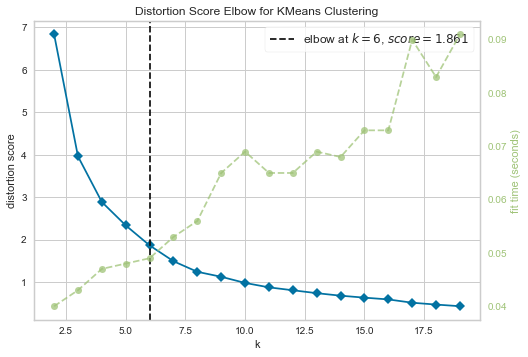

6

In [14]:
# Elbow method is used to find the optimum number of clusters for k-means.

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(X)
elbow.show()

elbow.elbow_value_

In [15]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(X)
sets = kmeans.labels_

In [16]:
dataset["cluster_no"] = sets

dataset["cluster_no"] = dataset["cluster_no"] + 1


In [17]:
dataset.head()

,place_name,city,town,address,name_rg,price_check_rg,rank_rg,rating_rg,price_rg,address_rg,features_rg,website_rg,instagram_rg,cuisine_rg,yelp_rg,trip_rg,google_rate,google_total,checkpoint,rating_rg_split,yelp_rate,yelp_total,zomato_rate,zomato_total,foursquare_rate,foursquare_total,trip_rate,trip_total,facebook_rate,facebook_total,total_score,google_score,total_score_scaled,google_score_scaled,cluster_no
0,11 Kadıköy,İstanbul,Kadıköy,CAFERAĞA MAH ARAYICI BAŞI SOK NO 11 A-1 KADIKO...,11 Kadıköy,No-Info,#221 of 72430 restaurants in Istanbul,Ratings of 11 Kadıköy\nZomato\n4.6 / 5\n1097\n...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nKadıköy\nArayıcıbaşı Sk. No:11, Istan...",Features\nСredit cards accepted\nOutdoor seati...,No-Info,@11kadikoy,Cocktail bars,No-Info,No-Info,4.4,437,True,Ratings of 11 Kadıköy Zomato 4.6 / 5 1097 Four...,0.0,0.0,4.6,1097.0,8.8,63.0,0.0,0.0,0.0,0.0,5323.40,1922.8,0.115786,0.077477,4
1,3g pub,İzmir,Konak,CUMHURİYET BULVARI NO:18 KONAK IZMIR,3G Cafe,Expensive (average price TRY 410 - TRY 830),#1732 of 12479 cafes in Izmir,Ratings of 3G Cafe\nYelp\nNot rated yet\nFours...,$$$$ Price range per person TRY 410 - TRY 830,Address\nÇankaya\nKonak Mahallesi İzmirlioğlu ...,Features\nСredit cards accepted\nOutdoor seati...,No-Info,No-Info,No-Info,no_rating,No-Info,3.5,21,True,Ratings of 3G Cafe Yelp Not rated yet Foursqua...,0.0,0.0,0.0,0.0,6.7,59.0,0.0,0.0,0.0,0.0,197.65,73.5,0.004299,0.002962,2
2,45 Bar Kadikoy,İstanbul,Kadıköy,İSTANBUL KADIKÖY KADIKOY ISTANBUL,45 Bar Kadikoy,No-Info,#1309 of 11620 pubs & bars in Istanbul,Ratings of 45 Bar Kadikoy\nZomato\n2.4 / 5\n83...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nKadıköy\nMiralay Nazım Sk. No:19/A, I...",Features\nСredit cards accepted\nWi-Fi\nBookin...,Website\n45likkadikoy.com,@45likcomtr,No-Info,No-Info,No-Info,3.7,565,True,Ratings of 45 Bar Kadikoy Zomato 2.4 / 5 83 Fo...,0.0,0.0,2.4,83.0,5.5,364.0,0.0,0.0,1.0,1.0,1201.20,2090.5,0.026127,0.084234,2
3,6:45 Losers Club,İzmir,Konak,1482 SOKAK NO:10 KONAK IZMIR,6:45 Losers Club,Moderate (average price TRY 170 - TRY 410),#47 of 599 clubs in Izmir,Ratings of 6:45 Losers Club\nGoogle\n955,$$$$ Price range per person TRY 170 - TRY 410,"Address\nÇankaya\nMuzaffer İzgü Sk. No:10, Izm...",Features\nNo delivery\nOutdoor seating\nNo tak...,No-Info,No-Info,No-Info,No-Info,No-Info,4.1,1011,True,Ratings of 6:45 Losers Club Google 955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4145.1,0.000000,0.167021,4
4,Adabeyi Balık Restoran,İzmir,Konak,ATATÜRK Cd.AKDENİZ Mh. No:19/d,Adabeyi Balık Restoran,Expensive (average price TRY 410 - TRY 830),#320 of 18291 restaurants in Izmir,Ratings of Adabeyi Balık Restoran\nYelp\n5\nZo...,$$$$ Price range per person TRY 410 - TRY 830,Address\nÇankaya\nKonak Atatürk Cad. Konak Pie...,Features\nСredit cards accepted\nOutdoor seati...,No-Info,No-Info,"Seafood, Turkish",yelp_block stars5,fill rate4_5,4.2,819,True,Ratings of Adabeyi Balık Restoran Yelp 5 Zomat...,5.0,5.0,3.8,48.0,8.1,899.0,4.5,127.0,4.2,539.0,6683.65,3439.8,0.145372,0.138602,4


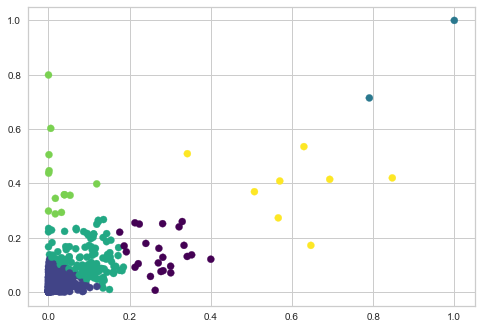

In [18]:
# Below is a visual representation of the clusters. As can be seen, the values are concentrated in the left, i.e the 
# majority has low scores.

plt.scatter(X.iloc[:, 0],
            X.iloc[:, 1],
            c=sets,
            s=50,
            cmap="viridis")
plt.show()

In [19]:
# Number of places in each cluster:

dataset.groupby("cluster_no").agg({"cluster_no": "count"})

,cluster_no
cluster_no,
1,24
2,409
3,2
4,118
5,13
6,8


In [20]:
# The clusters are not labeled in ascending order with the scores, so first google scores are taken as basis and their mean
# value for each cluster is calculated. Then the places are segmented according to those values.

cluster_sort = dataset.groupby("cluster_no").agg({"google_score_scaled":"mean"}).sort_values("google_score_scaled", ascending=False).iloc[:,0]

In [21]:
cluster_sort

cluster_no
3    0.857385
5    0.422428
6    0.388275
1    0.146785
4    0.124400
2    0.031867
Name: google_score_scaled, dtype: float64

In [22]:
dataset.loc[dataset["cluster_no"] == cluster_sort.index[0], "success_level"] = "Highest"
dataset.loc[dataset["cluster_no"] == cluster_sort.index[1], "success_level"] = "Very high"
dataset.loc[dataset["cluster_no"] == cluster_sort.index[2], "success_level"] = "High"
dataset.loc[dataset["cluster_no"] == cluster_sort.index[3], "success_level"] = "Medium"
dataset.loc[dataset["cluster_no"] == cluster_sort.index[4], "success_level"] = "Low"
dataset.loc[dataset["cluster_no"] == cluster_sort.index[5], "success_level"] = "Too low"

In [23]:
dataset.head()

,place_name,city,town,address,name_rg,price_check_rg,rank_rg,rating_rg,price_rg,address_rg,features_rg,website_rg,instagram_rg,cuisine_rg,yelp_rg,trip_rg,google_rate,google_total,checkpoint,rating_rg_split,yelp_rate,yelp_total,zomato_rate,zomato_total,foursquare_rate,foursquare_total,trip_rate,trip_total,facebook_rate,facebook_total,total_score,google_score,total_score_scaled,google_score_scaled,cluster_no,success_level
0,11 Kadıköy,İstanbul,Kadıköy,CAFERAĞA MAH ARAYICI BAŞI SOK NO 11 A-1 KADIKO...,11 Kadıköy,No-Info,#221 of 72430 restaurants in Istanbul,Ratings of 11 Kadıköy\nZomato\n4.6 / 5\n1097\n...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nKadıköy\nArayıcıbaşı Sk. No:11, Istan...",Features\nСredit cards accepted\nOutdoor seati...,No-Info,@11kadikoy,Cocktail bars,No-Info,No-Info,4.4,437,True,Ratings of 11 Kadıköy Zomato 4.6 / 5 1097 Four...,0.0,0.0,4.6,1097.0,8.8,63.0,0.0,0.0,0.0,0.0,5323.40,1922.8,0.115786,0.077477,4,Low
1,3g pub,İzmir,Konak,CUMHURİYET BULVARI NO:18 KONAK IZMIR,3G Cafe,Expensive (average price TRY 410 - TRY 830),#1732 of 12479 cafes in Izmir,Ratings of 3G Cafe\nYelp\nNot rated yet\nFours...,$$$$ Price range per person TRY 410 - TRY 830,Address\nÇankaya\nKonak Mahallesi İzmirlioğlu ...,Features\nСredit cards accepted\nOutdoor seati...,No-Info,No-Info,No-Info,no_rating,No-Info,3.5,21,True,Ratings of 3G Cafe Yelp Not rated yet Foursqua...,0.0,0.0,0.0,0.0,6.7,59.0,0.0,0.0,0.0,0.0,197.65,73.5,0.004299,0.002962,2,Too low
2,45 Bar Kadikoy,İstanbul,Kadıköy,İSTANBUL KADIKÖY KADIKOY ISTANBUL,45 Bar Kadikoy,No-Info,#1309 of 11620 pubs & bars in Istanbul,Ratings of 45 Bar Kadikoy\nZomato\n2.4 / 5\n83...,$$$$ Price range per person TRY 170 - TRY 410,"Address\nKadıköy\nMiralay Nazım Sk. No:19/A, I...",Features\nСredit cards accepted\nWi-Fi\nBookin...,Website\n45likkadikoy.com,@45likcomtr,No-Info,No-Info,No-Info,3.7,565,True,Ratings of 45 Bar Kadikoy Zomato 2.4 / 5 83 Fo...,0.0,0.0,2.4,83.0,5.5,364.0,0.0,0.0,1.0,1.0,1201.20,2090.5,0.026127,0.084234,2,Too low
3,6:45 Losers Club,İzmir,Konak,1482 SOKAK NO:10 KONAK IZMIR,6:45 Losers Club,Moderate (average price TRY 170 - TRY 410),#47 of 599 clubs in Izmir,Ratings of 6:45 Losers Club\nGoogle\n955,$$$$ Price range per person TRY 170 - TRY 410,"Address\nÇankaya\nMuzaffer İzgü Sk. No:10, Izm...",Features\nNo delivery\nOutdoor seating\nNo tak...,No-Info,No-Info,No-Info,No-Info,No-Info,4.1,1011,True,Ratings of 6:45 Losers Club Google 955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4145.1,0.000000,0.167021,4,Low
4,Adabeyi Balık Restoran,İzmir,Konak,ATATÜRK Cd.AKDENİZ Mh. No:19/d,Adabeyi Balık Restoran,Expensive (average price TRY 410 - TRY 830),#320 of 18291 restaurants in Izmir,Ratings of Adabeyi Balık Restoran\nYelp\n5\nZo...,$$$$ Price range per person TRY 410 - TRY 830,Address\nÇankaya\nKonak Atatürk Cad. Konak Pie...,Features\nСredit cards accepted\nOutdoor seati...,No-Info,No-Info,"Seafood, Turkish",yelp_block stars5,fill rate4_5,4.2,819,True,Ratings of Adabeyi Balık Restoran Yelp 5 Zomat...,5.0,5.0,3.8,48.0,8.1,899.0,4.5,127.0,4.2,539.0,6683.65,3439.8,0.145372,0.138602,4,Low


In [24]:
dataset[dataset["success_level"] == "Highest"]

,place_name,city,town,address,name_rg,price_check_rg,rank_rg,rating_rg,price_rg,address_rg,features_rg,website_rg,instagram_rg,cuisine_rg,yelp_rg,trip_rg,google_rate,google_total,checkpoint,rating_rg_split,yelp_rate,yelp_total,zomato_rate,zomato_total,foursquare_rate,foursquare_total,trip_rate,trip_total,facebook_rate,facebook_total,total_score,google_score,total_score_scaled,google_score_scaled,cluster_no,success_level
367,Tavacı Recep Usta Alsancak - İzmir,İzmir,Konak,ATATÜRK CAD.NO:364 KONAK IZMIR,Tavacı Recep Usta Alsancak - İzmir,No-Info,#134 of 18291 restaurants in Izmir,Ratings of Tavacı Recep Usta Alsancak - İzmir\...,$$$$ Price range per person TRY 410 - TRY 830,"Address\nAtatürk Cd. No:364, Izmir, İzmir, Turkey",Features\nСredit cards accepted\nOutdoor seati...,Website\ntavacirecepusta.com,@trecepusta,"Turkish, Steakhouses",yelp_block stars4_5,fill rate4,4.2,5909,True,Ratings of Tavacı Recep Usta Alsancak - İzmir ...,4.5,15.0,4.1,269.0,8.9,8724.0,4.0,1496.0,0.0,0.0,45976.2,24817.8,1.000000,1.000000,3,Highest
396,Viktor Levi Şarap Evi,İstanbul,Kadıköy,Caferağa Mah. Damacı Sok. No.4/A Kadıköy/İSTANBUL,Viktor Levi Şarap Evi,Moderate (average price TRY 250 - TRY 330),#1783 of 72430 restaurants in Istanbul,Ratings of Viktor Levi Şarap Evi\nYelp\n24\nZo...,$$$$ Price range per person TRY 250 - TRY 330,"Address\nKadıköy\nCaferağa Mh Moda Cd. &, Dama...",Features\nСredit cards accepted\nOutdoor seati...,Website\nviktorlevimoda.com,@viktorlevimoda,"Wine bars, Fast food, Seafood, Vegetarian options",yelp_block stars3_5,fill rate4,4.5,3942,True,Ratings of Viktor Levi Şarap Evi Yelp 24 Zomat...,3.5,24.0,4.4,1527.0,9.0,6327.0,4.0,265.0,4.0,4.0,36350.3,17739.0,0.790633,0.714769,3,Highest
